<a href="https://colab.research.google.com/github/Ken-huea/Time-series-analysis/blob/main/ARMA%E5%AE%9F%E8%A3%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ARMAモデル

自己回帰移動平均モデルと呼ばれ、MAモデルとARモデルを組み合わせたモデルである。

次数：p
次数：q



### MAモデル　p

移動平均モデル。「将来のYは過去の誤差によって説明される」
　「将来の予測値は、過去の予測値と実績値との誤差により決まる」

例えば、今月の売上量が、本来売上げる量より多かったら、来月は売上量が増える

次数：<font color="red">q</font>

過去どれだけ遡ると良くなるのかを試行する。

### ARモデル　q


自己回帰　「将来のYは、過去のYによって説明される」

「将来の予測値は、過去の予測値により決まる」、

例えば、今月の売上量が多かったら、来月は売上量が増える

次数：p

## データの読み込みと整形、分割まで

今回使用するデータは、気温の時系列データです。

データ配布元：http://www.data.jma.go.jp/gmd/risk/obsdl/index.php

**まずは、理解を容易にするため、気温データのみを用います**

In [ ]:
import pandas as pd
weather_df = pd.read_csv("/content/weather (1).csv", encoding="shift-jis")

In [ ]:
weather_df

#### データ整形

In [ ]:
# 今回使わないカラムを削除する
weather_df = weather_df.drop(columns = ["降水量の合計(mm)","平均現地気圧(hPa)","平均風速(m/s)","日照時間(時間)"])
weather_df

,年月日,平均気温(℃)
0,2015/1/1,3.7
1,2015/1/2,2.7
2,2015/1/3,3.8
3,2015/1/4,4.0
4,2015/1/5,6.9
...,...,...
1822,2019/12/28,6.8
1823,2019/12/29,7.0
1824,2019/12/30,6.7
1825,2019/12/31,8.2


In [ ]:
weather_df.info()
# weather_df.dtype()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   年月日      1827 non-null   object 
 1   平均気温(℃)  1827 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.7+ KB


In [ ]:
weather_df.index = pd.to_datetime(weather_df["年月日"], infer_datetime_format=True)  
# 100 loops, best of 3: 10.4 ms per loop
weather_df = weather_df.drop(columns = ["年月日"])
weather_df

,平均気温(℃)
年月日,
2015-01-01,3.7
2015-01-02,2.7
2015-01-03,3.8
2015-01-04,4.0
2015-01-05,6.9
...,...
2019-12-28,6.8
2019-12-29,7.0
2019-12-30,6.7


In [ ]:
data = weather_df["2015":"2020"].resample("M").mean()
data

,平均気温(℃)
年月日,
2015-01-31,5.783871
2015-02-28,5.717857
2015-03-31,10.251613
2015-04-30,14.523333
2015-05-31,21.100000
...,...
2019-09-30,25.060000
2019-10-31,19.425806
2019-11-30,13.100000


### 訓練データ・テストデータの分割
5対5で。



In [ ]:
train=data[:int(len(data)*0.5)] # この長さまで。
test=data[int(len(data)*0.5):] # この長さ以降。

In [ ]:
train

## モデル作成と確認

AR/ARMAモデルをそれぞれ作成する

In [ ]:
from statsmodels.tsa.arima_model import ARMA
model_arma = ARMA(train, order=[1, 1])  # 学習データを食べさせる。そしてpとqも指定。
# モデルの学習
result_arma = model_arma.fit()

学習したモデルがどうなのか、可視化して確認してみましょう。

その為にpredを求めます。

In [ ]:
test

In [ ]:
# 予測⇒どの期間を予測するのかはtest_yで確認。⇒日付だけはtestとpred双方とも合致していると確認しましょう。
pred = result_arma.predict("2017-07-31","2020-01-31")
pred.head(5)
pred.tail(5)

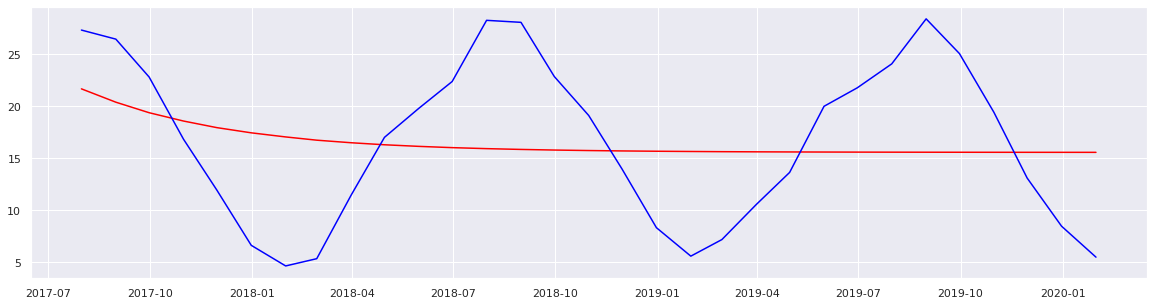

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(20,5))

#1つ目のデータをplotメソッドでプロット
plt.plot(pred, color = 'red',label="pred")

#2つ目のデータをplotメソッドでプロット
plt.plot(test, color = 'blue',label="acutual")
plt.show()

観たらわかる。全く上手く行ってませんね。どうすればよいでしょうか？

きっとパラメータ設定がおかしいのでしょう。この部分を調整して確認しましょう。


```
model_arma = ARMA(train, order=[1, 1])
```




# パラメータ調整して再度チャレンジ

ARMAモデルが正常に予測できていないので、p,qを調整します。



ARMAモデルのパラメータ調整に使えるパラメータがありますので、その通りに実装してみてください

In [ ]:
# pとqの自動更新ライブラリ

from statsmodels.tsa.stattools import arma_order_select_ic

#arがp maがq ⇒ 最大を指定。⇒大体この位で良いものです。時間もかかるし。
arma_order_select_ic(train, max_ar=4, max_ma=4, ic='aic')

#出力結果を確認し、良いパラメータにて再学習しましょう。

In [ ]:
test.head(3)

,平均気温(℃)
年月日,
2017-07-31,27.319355
2017-08-31,26.448387
2017-09-30,22.806667


In [ ]:
from statsmodels.tsa.arima_model import ARMA
model_arma = ARMA(train, order=[2, 3])  # 学習データを食べさせる。そしてpとqも指定。
# モデルの学習
result_arma = model_arma.fit()

ValueError: ignored

In [ ]:
# 予測⇒どの期間を予測するのかはtest_yで確認。⇒日付だけはtest_yとpred双方とも合致していると確認しましょう。
pred = model_arma.predict("2017-07-31","2020-01-31")
pred.head(5)
pred.tail(5)

IndexError: ignored

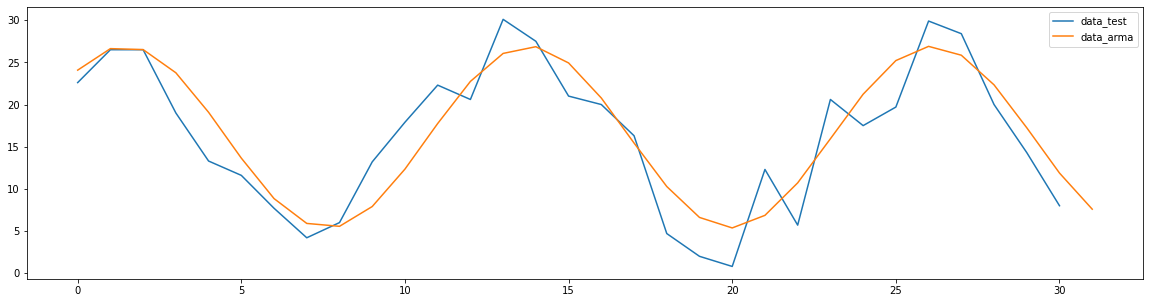

In [ ]:
# ARMA
plt.plot(test,label="data_test")
plt.plot(prediction_arma,label="data_arma")
plt.legend()
plt.show()

# 別のモジュールを用いてARMAを予測
[これが参考colab](https://colab.research.google.com/drive/1dfFfrMthALaICyI-tydWfJGjbroUqTnt#scrollTo=GAFQVK0ljIQY)

⇒上手く行かなかった。

In [ ]:
#いろいろインポート
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# AR/ MA/ ARMAモデルの予測用モジュールのインポート
from statsmodels.tsa.arima_process import arma_generate_sample
import statsmodels.api as sm 

In [ ]:
#データの確認
data.head(4)
train.head(4)
test.head(4)

,平均気温(℃)
年月日,
2015-01-31,5.783871
2015-02-28,5.717857
2015-03-31,10.251613
2015-04-30,14.523333


学習

In [ ]:
y = data["平均気温(℃)"]#予測したいもの。データを格納。
# Dはなんでしたっけ？⇒ freq="D"　一日毎　daysのD　monthのM
arma_model = sm.tsa.ARMA(y, order=(2,1),freq="D")
result = arma_model.fit()

result.summary()

ValueError: ignored